# Decision Tree

In [1]:
import pandas as pd
df = pd.read_csv("Income.csv")
df.head()

,Age,Income,Student,Credit,effect
0,<30,high,no,fair,negative
1,<=30,high,no,excellent,negative
2,31-40,high,no,fair,positive
3,>40,medium,no,fair,positive
4,<=30,high,no,fair,negative


In [2]:
inputs = df.drop('effect', axis = 'columns')
target = df['effect']

In [3]:
inputs.head()

,Age,Income,Student,Credit
0,<30,high,no,fair
1,<=30,high,no,excellent
2,31-40,high,no,fair
3,>40,medium,no,fair
4,<=30,high,no,fair


## Label string with random value using LabelEncoder

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
new_age = LabelEncoder()
new_Income = LabelEncoder()
new_Student = LabelEncoder()
new_Credit = LabelEncoder()
new_d = LabelEncoder()

In [6]:
inputs['age_n'] = new_age.fit_transform(inputs['Age'])
inputs['Income_n'] = new_Income.fit_transform(inputs['Income'])
inputs['Student_n'] = new_Student.fit_transform(inputs['Student'])
inputs['Credit_n'] = new_Credit.fit_transform(inputs['Credit'])
target = new_d.fit_transform(target)
inputs.head()

,Age,Income,Student,Credit,age_n,Income_n,Student_n,Credit_n
0,<30,high,no,fair,1,0,0,1
1,<=30,high,no,excellent,2,0,0,0
2,31-40,high,no,fair,0,0,0,1
3,>40,medium,no,fair,3,2,0,1
4,<=30,high,no,fair,2,0,0,1


In [7]:
inputs_n = inputs.drop(['Age', 'Income', 'Student', 'Credit'], axis = 'columns')

In [8]:
inputs_n.head()

,age_n,Income_n,Student_n,Credit_n
0,1,0,0,1
1,2,0,0,0
2,0,0,0,1
3,3,2,0,1
4,2,0,0,1


In [9]:
from sklearn import tree

In [10]:
model = tree.DecisionTreeClassifier()

In [11]:
model.fit(inputs_n, target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
model.score(inputs_n,target)
inputs.head()

,Age,Income,Student,Credit,age_n,Income_n,Student_n,Credit_n
0,<30,high,no,fair,1,0,0,1
1,<=30,high,no,excellent,2,0,0,0
2,31-40,high,no,fair,0,0,0,1
3,>40,medium,no,fair,3,2,0,1
4,<=30,high,no,fair,2,0,0,1


In [13]:
model.predict([[2,2,0,0]])

array([0])

## Genarating Decision Tree Visualization

In [14]:
from sklearn import metrics,model_selection
from IPython.display import Image, display
import matplotlib.pyplot as plt,pydotplus

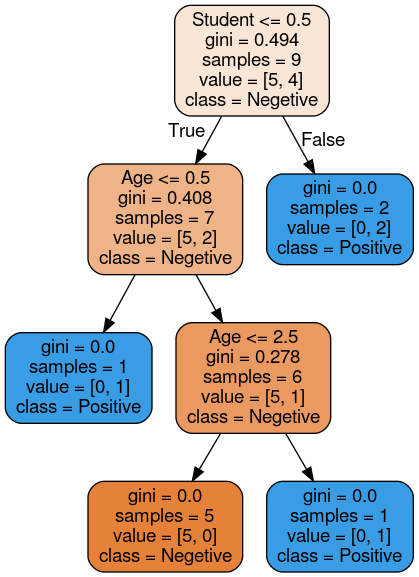

In [15]:
ddata=tree.export_graphviz(model,out_file=None,filled=True,rounded=True,
                          feature_names=['Age','Income','Student','Credit'],
                          class_names=['Negetive','Positive'])
graph=pydotplus.graph_from_dot_data(ddata)
display(Image(graph.create_png()))